# <strong>Superstore Sales Analysis</strong>

# Introduction
## This project analyzes the sales and profit performance of a retail store across various product categories and regions. The goal is to identify trends, strengths, and areas of improvement for the business. By leveraging data visualization techniques, we aim to provide actionable insights that can help optimize profitability, enhance sales strategies, and ensure sustained business growth. Key metrics such as total sales and total profit were studied to evaluate the performance of different regions and categories.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading the dataset
df = pd.read_excel('/laptop/Python/project/Superstore.xlsx',index_col='Row ID')

In [3]:
#First few rows
df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df["Order Date"]

Row ID
1      2013-11-09
2      2013-11-09
3      2013-06-13
4      2012-10-11
5      2012-10-11
          ...    
9990   2011-01-22
9991   2014-02-27
9992   2014-02-27
9993   2014-02-27
9994   2014-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [5]:
df.shape

(9994, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [7]:
# Handling missing values
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.drop_duplicates().head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Sales and Profit Analysis


In [9]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
print(f'Total sales : ${total_sales:.2f} \nTotal profit : ${total_profit:.2f}')

Total sales : $2297200.86 
Total profit : $286397.02


- ### Total Sales and Profits by Category 

In [10]:
category_summary = df.groupby('Category').agg({'Sales':'sum','Profit':'sum'}).reset_index()
category_summary

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


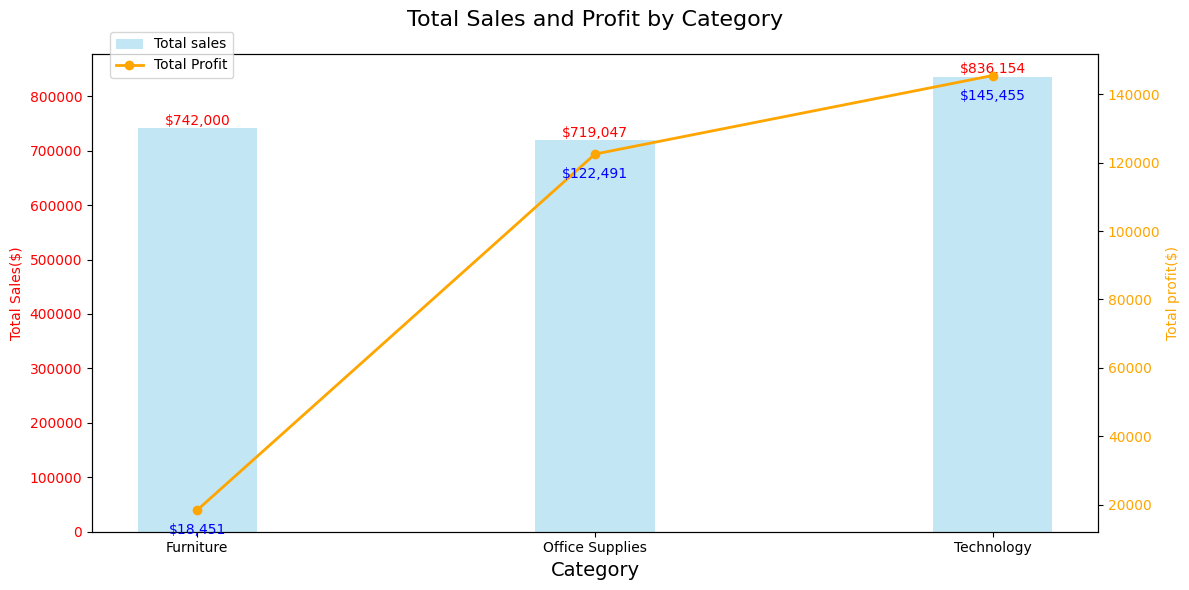

In [11]:
figure,axis = plt.subplots(figsize=(12,6))
# creating a bar graph for category and sales 
axis.bar(category_summary['Category'],category_summary['Sales'],color='skyblue',alpha=0.5,label='Total sales',width=0.3)
# adding data values in bars
for index,value in enumerate(category_summary['Sales']):
    axis.text(index,value+500,f"${value:,.0f}",va='bottom',ha='center',color='red')
axis.set_xlabel('Category',fontsize=14)
axis.set_ylabel("Total Sales($)",color='red')
axis.tick_params(axis='y',labelcolor='red')

# creating twin axis 
axis2 = axis.twinx()
axis2.plot(category_summary['Category'],category_summary['Profit'],color='orange',marker='o',linewidth=2,label='Total Profit')
for index,value in enumerate(category_summary['Profit']):
    axis2.text(index,value-8000,f"${value:,.0f}",va='bottom',ha='center',color='blue')
axis2.set_ylabel("Total profit($)",color='orange')
axis2.tick_params(axis='y',labelcolor='orange')
# Adding titles and legends
plt.title('Total Sales and Profit by Category', fontsize=16, pad=20)
figure.legend(loc='upper left', bbox_to_anchor=(0.09, 0.95), fontsize=10)
plt.tight_layout()
plt.savefig('salesprofitbycategory.png',dpi=30)
plt.show()

1. Total Sales:

- Furniture had a total sales value of $742,000.
- Office Supplies achieved $719,047 in total sales.
- Technology led with the highest total sales of $836,154.

2. Total Profit:

- Furniture generated the lowest profit at $18,451.
- Office Supplies showed moderate profitability with a total of $122,491.
- Technology stood out with the highest profit of $145,455.

3. Profitability Discrepancy:

- Despite high sales figures for Furniture, its profit margin is significantly lower compared to other categories. This might indicate higher costs or lower margins in the Furniture category.
- Technology, which has the highest total sales, also enjoys the highest profit, showcasing its strong margin and contribution to overall profitability.

4. Trend:

- The yellow line (representing profit) shows a steady upward trend from Furniture to Technology. This implies a better return on investment as we move towards Technology products.

- ### Total Sales and Profits by Region

In [12]:
region_summary = df.groupby('Region').agg({'Sales':'sum','Profit':'sum'}).reset_index()
region_summary

,Region,Sales,Profit
0,Central,501239.8908,39706.3625
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
3,West,725457.8245,108418.4489


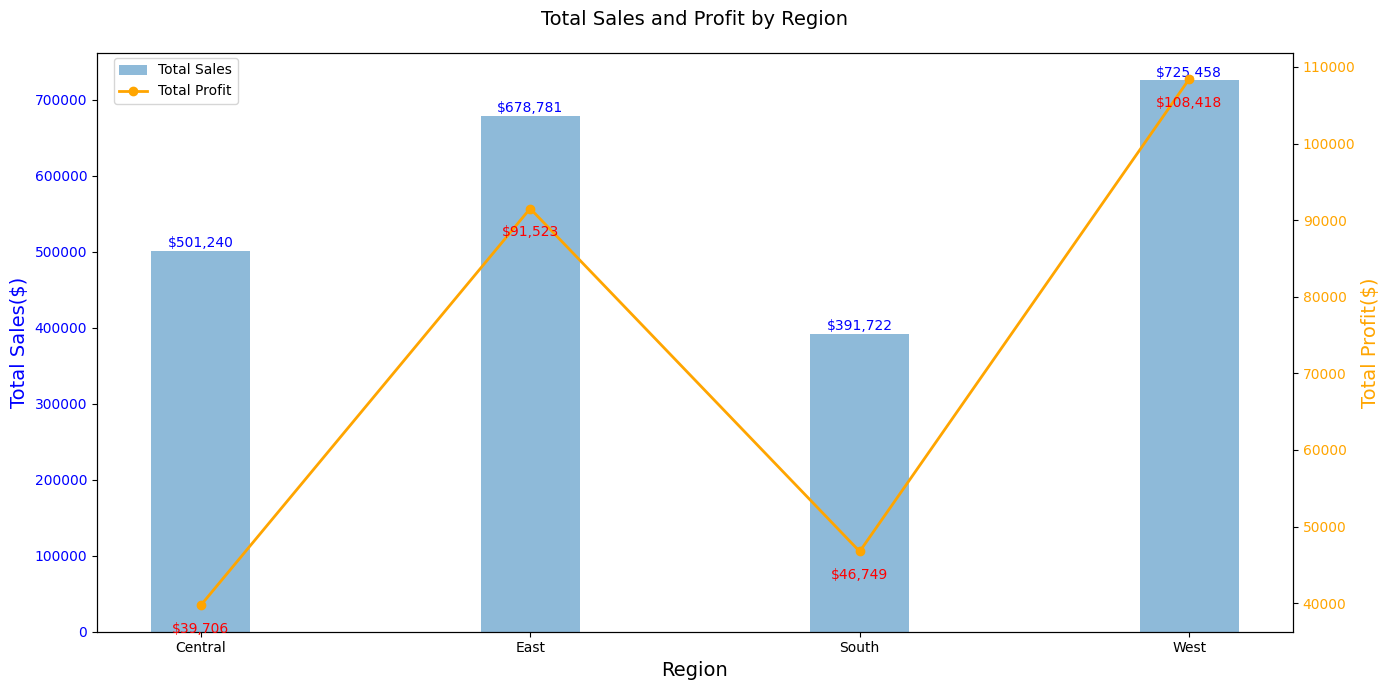

In [13]:
fig,ax = plt.subplots(figsize=(14,7))
ax.bar(region_summary['Region'],region_summary['Sales'],alpha=0.5,label='Total Sales',width=0.3)
for index,value in enumerate(region_summary['Sales']):
    ax.text(index,value+1000,f"${value:,.0f}",va="bottom",ha='center',color='blue')
ax.set_ylabel('Total Sales($)',color='blue',fontsize=14)
ax.tick_params(axis='y',labelcolor='blue')
ax.set_xlabel('Region',fontsize=14)
ax2 = ax.twinx()
ax2.plot(region_summary['Region'],region_summary['Profit'],color='orange',marker='o',linewidth=2,label='Total Profit')
for index,value in enumerate(region_summary['Profit']):
    ax2.text(index,value-4000,f"${value:,.0f}",va="bottom",ha='center',color='red')
ax2.set_ylabel('Total Profit($)',color='orange',fontsize=14)
ax2.tick_params(axis='y',labelcolor='orange')
fig.legend(loc='upper left',bbox_to_anchor=(0.08,0.92),fontsize=10)
plt.title("Total Sales and Profit by Region",pad=20,fontsize=14)
plt.tight_layout()
plt.savefig('salesprofitbyregion.png',dpi=30)
plt.show()

1. Total Sales:
- Central: Total sales amount to $501,240.
- East: Leads in total sales with $678,781,slightly above the Central region.
- South: Records the lowest total sales at $391,722.
- West: Achieves strong sales of $725,458 among all regions.

2. Total Profit:

- Central: Has the lowest profit among all regions, at $39,706, making it the least profitable region.
- East: Generates a healthy profit of $91,523, reflecting effective management of costs or higher margins.
- South: Profits are notably low at $46,749, indicating inefficiency despite strong sales.
- West: Exhibits the highest profitability at $108,418, showcasing a strong return on investment.
3. Trends and Observations:
- The East and West regions are the most profitable, with high sales and profits. Particularly, the West stands out with the highest profit of $108,418 and having slightly higher sales than the East.
- The South region struggles in both sales and profit, suggesting it requires attention to boost performance.
- The Central region has decent sales but low profit, which may indicate issues with cost management or pricing strategies.
4. Insights:
- East and West regions are key revenue drivers, and efforts should be made to maintain and grow their performance.
- Central region needs analysis of cost structure and pricing to improve profit margins.
- South region requires strategic interventions, such as targeted marketing or operational efficiency improvements, to boost both sales and profit.

- ### Total sales and profits by quarter


In [14]:
# Extracting the quarter and year from the 'Order Date'
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Grouping by Quarter and calculate total sales and profit
quarterly_sales_profit = df.groupby('Quarter').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Renaming columns for clarity
quarterly_sales_profit = quarterly_sales_profit.rename(columns={
    'Sales': 'Total Sales',
    'Profit': 'Total Profit'
})

print(quarterly_sales_profit)

   Quarter  Total Sales  Total Profit
0   2011Q1   74447.7960     3811.2290
1   2011Q2   86538.7596    11204.0692
2   2011Q3  143633.2123    12804.7218
3   2011Q4  179627.7302    21723.9541
4   2012Q1   68851.7386     9264.9416
5   2012Q2   89124.1870    12190.9224
6   2012Q3  130259.5752    16853.6194
7   2012Q4  182297.0082    23309.1203
8   2013Q1   92596.4190    11446.3415
9   2013Q2  135370.1130    16084.9055
10  2013Q3  144614.4282    16153.5046
11  2013Q4  235892.8698    38042.1792
12  2014Q1  118895.6174    21772.2303
13  2014Q2  134023.4058    17165.7570
14  2014Q3  200433.1730    26913.4451
15  2014Q4  280594.8270    27656.0807


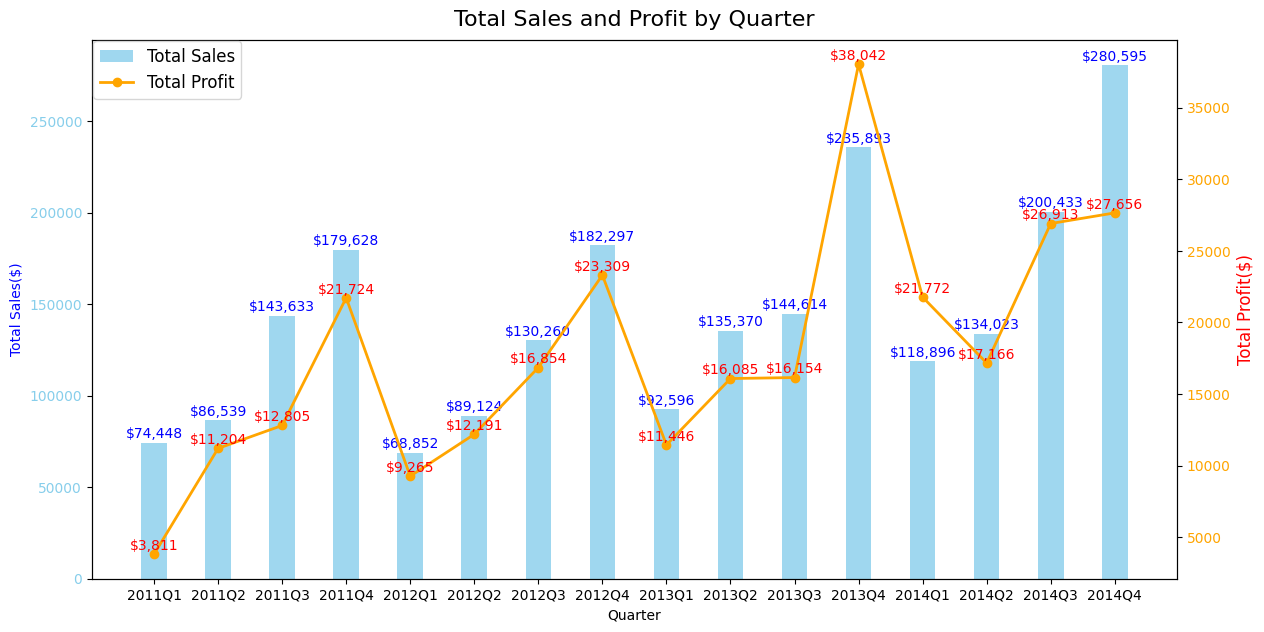

In [15]:
quarterly_sales_profit['Quarter'] = quarterly_sales_profit['Quarter'].astype(str)
fig,ax = plt.subplots(figsize=(14,7))
ax.bar(quarterly_sales_profit['Quarter'],quarterly_sales_profit['Total Sales'],color='skyblue',alpha=0.8,label="Total Sales",width=0.4)
for i,sales in enumerate(quarterly_sales_profit['Total Sales']):
    ax.text(i,sales+1000,f"${sales:,.0f}",ha='center',va='bottom',fontsize=10,color='blue')
ax.tick_params(axis='y',labelcolor="skyblue")
ax.set_ylabel("Total Sales($)",color="blue")
ax.set_xlabel("Quarter",color='black')

ax2 = ax.twinx()
ax2.plot(quarterly_sales_profit['Quarter'],quarterly_sales_profit['Total Profit'],color='orange',marker='o',label='Total Profit',linewidth=2)
for i,profit in enumerate(quarterly_sales_profit['Total Profit']):
    ax2.text(i,profit+100,f'${profit:,.0f}',va='bottom',ha='center',fontsize=10,color='red')
ax2.tick_params(axis='y',labelcolor='orange')
ax2.set_ylabel('Total Profit($)',color='red',fontsize=12)

plt.title('Total Sales and Profit by Quarter', fontsize=16, pad=10)
fig.legend(loc='upper left',bbox_to_anchor=(0.12,0.89), fontsize=12)
# plt.savefig('salesprofitbyquarter.png',dpi=300)
plt.show()

1.Sales Growth Pattern:

- There is a general upward trend in sales over time, with certain quarters showing significant spikes (e.g., 2014Q4 with the highest sales of $280,595).
- The growth in sales from 2011Q1 to 2014Q4 indicates expanding market reach or improved business operations.

2.Profit Peaks and Dips:

- Profits peaked in 2012Q4 at $23,309 and 2014Q4 at $27,656.
- Despite strong sales in some quarters, the profit margin varies, such as in 2011Q3, where sales grew significantly, but profits did not increase proportionally.

3.Quarterly Variations:

- Some quarters, like 2012Q3 and 2013Q2, show a mismatch where sales increased but profits did not grow as much, indicating possible high costs or discounts during these periods.
- Conversely, 2014Q3 shows a balanced increase in both sales and profit.

4.Key Profit Opportunities:

- High-profit quarters like 2012Q4 and 2014Q4 could point to effective sales strategies, successful product launches, or cost optimizations.
- Studying these quarters could help identify factors that led to profitability.

5.Low Profit Margins:

- Early quarters, such as 2011Q1 and 2011Q2, have significantly lower profits despite moderate sales, suggesting high operating costs or inefficient processes at the time.

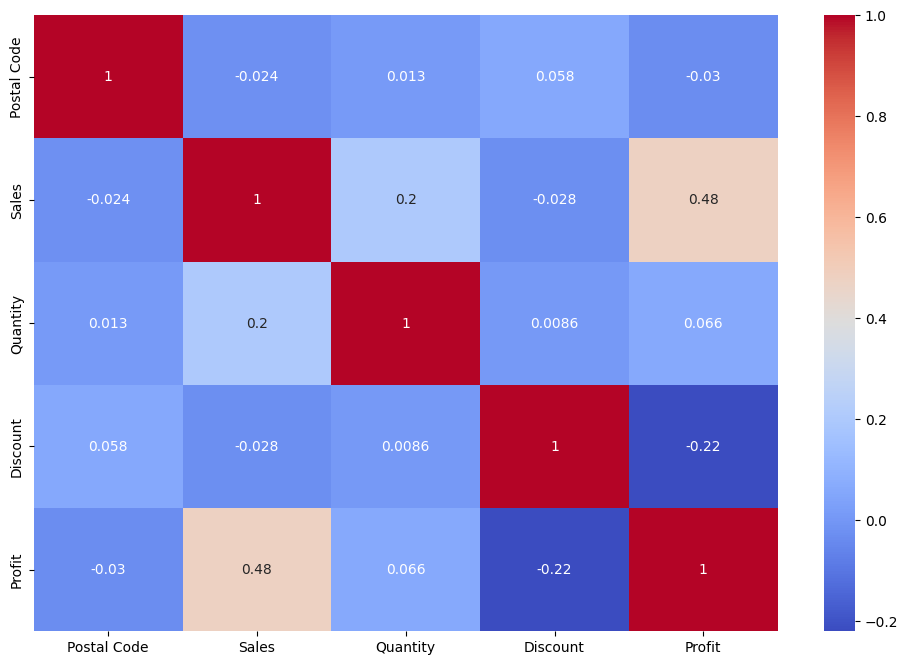

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(numeric_only=True),cmap='coolwarm',annot=True)
# plt.savefig("corrdata",dpi=300)
plt.show()

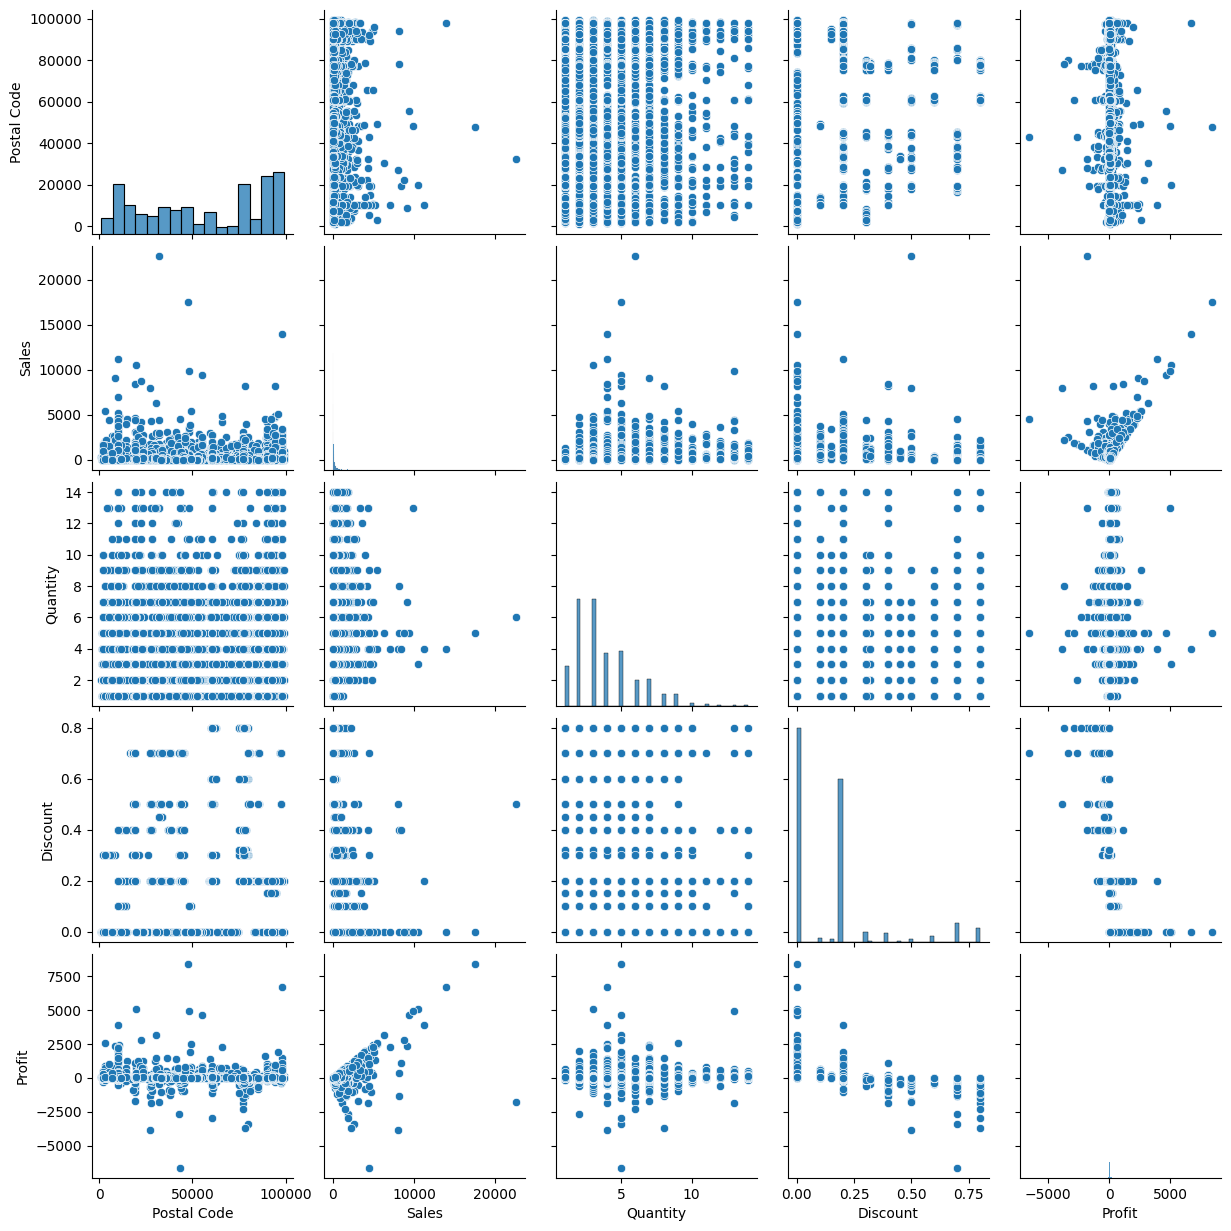

In [17]:

sns.pairplot(data=df,palette='viridis')
plt.savefig("plot.png",dpi=300)
plt.show()

- ### Sales vs. Profit: There is a clear positive correlation between Sales and Profit. As sales increase, profit tends to increase as well. However, there is also a significant amount of variability, indicating that other factors besides sales play a role in determining profit.

- ### Sales vs. Quantity: A positive correlation is observed between Sales and Quantity. This is expected, as higher sales are likely associated with larger quantities sold.

- ### Sales vs. Discount: There appears to be a weak negative correlation between Sales and Discount. This suggests that higher discounts might be associated with slightly lower sales, although the relationship is not very strong.

- ### Profit vs. Discount: A weak negative correlation is also visible between Profit and Discount. This aligns with the previous observation, as higher discounts could potentially lead to lower profits.

- ### Quantity vs. Discount: A weak negative correlation is observed between Quantity and Discount. This could indicate that higher discounts might be associated with slightly lower quantities sold.

- ### Postal Code: The distribution of Postal Codes appears to be relatively uniform. There is no apparent pattern or correlation with other variables.

# Key Insights
### 1. Category-Wise Performance:

- <strong>Technology</strong> leads with the highest sales and profit, indicating strong customer demand and higher profit margins.
- <strong>Furniture</strong> has high sales but low profit, suggesting possible inefficiencies or pricing challenges.
- <strong>Office</strong> Supplies has steady sales and profit, providing consistent but moderate contributions.

### 2. Region-Wise Performance:

- The <strong>West</strong> region has the highest profit, making it the most efficient and profitable region.
- The <strong>East</strong> region leads in sales and shows strong profit figures.
- The <strong>Central</strong> region, despite decent sales, lags in profitability, indicating room for cost optimization.
- The <strong>South</strong> region has the lowest sales and profit, requiring strategic improvement.

### 3. Quarter-Wise Performance:

- Sales and profit generally increased over time, with noticeable peaks in Q4 of most years, indicating strong seasonality (likely due to holiday shopping trends).
- The highest profit is observed in 2014 Q4 ($27,656), paired with the highest total sales ($280,595).
- Periods such as 2011 Q1 and 2013 Q1 show significantly lower sales and profit, pointing to potential off-peak seasons or economic factors.
- Profits don't always grow proportionally to sales. For example, 2012 Q4 achieved high sales of $182,297 but moderate profit of $23,309.

### 4. Correlation Insights:

- A moderate positive correlation (0.48) exists between Sales and Profit, meaning higher sales generally lead to higher profits, but other factors like discounts and costs play a role.
- Discounts negatively correlate with profits (-0.22), indicating that offering higher discounts often reduces profitability.
- A weak correlation (0.20) between Sales and Quantity shows that higher quantities sold do not necessarily translate into significantly higher sales revenue.
- The negligible correlation between Quantity and Profit (0.066) highlights the need to focus on selling high-margin products rather than just increasing the volume of sales.
- Discounts show almost no impact on sales (-0.028), suggesting their limited effectiveness in driving revenue.
- Postal Code does not meaningfully correlate with other variables, indicating its role as a geographical identifier.It does not directly influence sales, profit, or other business metrics.

# Final Conclusion
The analysis provides a comprehensive understanding of the performance of the Superstore across categories, regions, time periods, and key variables.

### 1. <strong>Category</strong> and <strong>Regional Trends</strong>:

- The Technology category and West region are standout performers, providing the most significant contributions to sales and profitability.
- Underperforming areas like Furniture and the South region require strategic interventions to optimize costs and improve profit margins.
### 2. <strong>Seasonality and Growth</strong>:

- Quarterly trends highlight strong seasonality, with Q4 of most years consistently achieving peak sales and profit, particularly in 2014 Q4. Planning inventory and campaigns around these periods can maximize results.
### 3. <strong>Discount Strategies</strong>:

- Discounts show a negative impact on profits and do not significantly drive sales, suggesting a need for more targeted and strategic use of discounting.
### 4. <strong>Sales vs. Profit Analysis </strong>:

- While higher sales tend to lead to higher profits, the correlation is not strong enough to ignore other factors like cost optimization and product margins. Efforts should focus on improving the profitability of high-sales products.
### 5. <strong>Product and Customer Strategies</strong>:

- Focusing on high-margin products and reducing dependence on discounts can substantially improve overall profitability. Additionally, identifying regional and category-specific opportunities will help drive targeted growth.